# Handwritten Digit Recognition

A handwritten digit recognizer using MNIST dataset.


In [31]:
#The used packages
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from keras.optimizers import SGD

physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

<h2>Loading the data</h2>

I have divided the data into three groups:<br>
training data (xtr,ytr) : used to train the model<br>
validation data (xval,yval) : used to tone the model<br>
test data (xtest,ytest) : used for the final evaluation of the model<br>


In [8]:
(xtr,ytr),(x,y) = keras.datasets.mnist.load_data()
print(xtr.shape, ytr.shape)
print(x.shape,y.shape)
print('Type of data is ',type(xtr[0]),type(ytr[0]))
print(xtr.max(),ytr.max(),x.max(),y.max())
#dividing x and y into valdition and test data
xval,xtest,yval,ytest=x[0:8000],x[8000:10000],y[0:8000],y[8000:10000]
print(xtest.shape,ytest.shape,xval.shape,yval.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
Type of data is  <class 'numpy.ndarray'> <class 'numpy.uint8'>
255 9 255 9
(2000, 28, 28) (2000,) (8000, 28, 28) (8000,)


<h2> Visualizing the MNIST dataset


Text(0.5, 0.98, 'The first ten numbers of the training set')

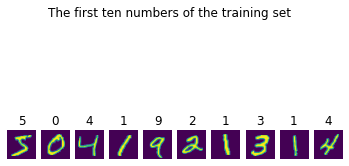

In [10]:
#show the first ten numbers
#(1,10)= 1 rows, ten columns
#x = an array of Axes objects
figure,x = plt.subplots(1,10)
for i in range(10):
    x[i].imshow(xtr[i])
    x[i].set_title(ytr[i])
    #don't show axis, cuz it's ugly here :(
    x[i].axis('off')
figure.suptitle("The first ten numbers of the training set")

<h2>Pre-Processing</h2>

since the data is already known to be clean, the Pre-Processing stage will be a short and nice one: I have only normalized the data, and done one hot encoding on the labels. 



In [11]:
# Normalizing the data
#using float 16 insted of float 32 since it's more efficient
xtr = xtr.astype(np.float16)/255.0
xval = xval.astype(np.float16)/255.0
xtest = xtest.astype(np.float16)/255.0

#one hot encoding 
ytr_oh = keras.utils.to_categorical(ytr)
yval_oh = keras.utils.to_categorical(yval)
ytest_oh = keras.utils.to_categorical(ytest)

print("First digit:",yval[:1])
print("One-hot-encoded version:\n",yval_oh[:1])

First digit: [7]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


<h2>Modeling, Toning  and Evaluation

I started with a small general model and then added more complexity until I started having an overfitting problem, then I moved on to a convolutional neural network. I have built 4 models and the last one was the best.

In [15]:
tf.random.set_seed(42)

model1 = Sequential()
#the dimension of our digit images is 28×28.Because the input dimension of a fully-connected layer is 784, we need to insert another layer into the network, called Flatten, to change tensor shape from 28×28 to 784
model1.add(Flatten(input_shape=(28,28)))
#We want th output of the network to return the probability of the input digit being equal to  . Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. To turn it into a probability we need to apply another layer called Softmax.
model1.add(Dense(10,activation="softmax"))
           
model1.compile(SGD(momentum=0.5,learning_rate=.1),loss='categorical_crossentropy',metrics=['acc'])
model1.fit(xtr,ytr_oh,validation_data=(xval,yval_oh), epochs=25)
model1.summary()
#that model's val_accuracy is already 92.2% although it's very simple one

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3770 - acc: 0.8921 - val_loss: 0.3335 - val_acc: 0.9044
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - acc: 0.9145 - val_loss: 0.3127 - val_acc: 0.9112
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2896 - acc: 0.9182 - val_loss: 0.2989 - val_acc: 0.9158
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2825 - acc: 0.9207 - val_loss: 0.3045 - val_acc: 0.9160
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2773 - acc: 0.9224 - val_loss: 0.3071 - val_acc: 0.9149
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2744 - acc: 0.9237 - val_loss: 0.2955 - val_acc: 0.9168
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2706 - acc: 0.9246 - val_loss: 0.3089 - val_acc: 0.9162
Epoch 8/25
1875/1875 [==============================] - 2s 1ms

In [16]:
#final evalution of model1
_, accuracy = model1.evaluate(xtest,ytest_oh)
print('Accuracy: %.2f' % (accuracy*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.1873 - acc: 0.9425
Accuracy: 94.25


In [18]:
#Multi-Layer networks
#adding more hidden layers
#starting with a simple model of only 2 layers
tf.random.set_seed(42)

model2 = Sequential()
#the dimension of our digit images is 28×28.Because the input dimension of a fully-connected layer is 784, we need to insert another layer into the network, called Flatten, to change tensor shape from 28×28 to 784
model2.add(Flatten(input_shape=(28,28)))

# 784 inputs, 100 outputs
model2.add(Dense(100,activation="relu"))     

#We want th output of the network to return the probability of the input digit being equal to  . Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. To turn it into a probability we need to apply another layer called Softmax.
model2.add(Dense(10,activation="softmax"))
           
model2.compile(SGD(learning_rate=.1),loss='categorical_crossentropy',metrics=['acc'])
model2.fit(xtr,ytr_oh,validation_data=(xval,yval_oh), epochs=21)
model2.summary()
#val_accuracy = %97.84

Epoch 1/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3062 - acc: 0.9111 - val_loss: 0.1916 - val_acc: 0.9423
Epoch 2/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1482 - acc: 0.9576 - val_loss: 0.1467 - val_acc: 0.9555
Epoch 3/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - acc: 0.9685 - val_loss: 0.1111 - val_acc: 0.9650
Epoch 4/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857 - acc: 0.9751 - val_loss: 0.1007 - val_acc: 0.9688
Epoch 5/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0709 - acc: 0.9792 - val_loss: 0.0988 - val_acc: 0.9695
Epoch 6/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0606 - acc: 0.9823 - val_loss: 0.0886 - val_acc: 0.9743
Epoch 7/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - acc: 0.9849 - val_loss: 0.0836 - val_acc: 0.9743
Epoch 8/21
1875/1875 [==============================] - 3s 2ms

In [19]:
#final evalution of model2
_, accuracy = model2.evaluate(xtest,ytest_oh)
print('Accuracy: %.2f' % (accuracy*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.0466 - acc: 0.9865
Accuracy: 98.65


<h3>Moving on to CNN:</h3>

the layer Conv2D from keras expects the input to be of the shape  W×H×C, where W and H are width and height of the image, and C is the number of color channels. Since the MINST dataset is grayscale, Then we need the same shape with C set to 1 this time.


In [23]:
xtr_c = np.expand_dims(xtr,3)
xval_c = np.expand_dims(xval,3)
xtest_c = np.expand_dims(xtest,3)
print(xtr_c.shape)

(60000, 28, 28, 1)


In [27]:
tf.random.set_seed(42)
model3 = keras.models.Sequential()

model3.add(Conv2D(filters=9, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'))

model3.add(Flatten())

model3.add(Dense(10,activation="softmax"))

model3.compile(loss='categorical_crossentropy',metrics=['acc'])

model3.fit(xtr_c,ytr_oh,validation_data=(xval_c,yval_oh),epochs=21)

model3.summary()
#val_accuracy = %98.39

Epoch 1/21
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2180 - acc: 0.9364 - val_loss: 0.1047 - val_acc: 0.9693
Epoch 2/21
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0862 - acc: 0.9755 - val_loss: 0.0774 - val_acc: 0.9761
Epoch 3/21
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0666 - acc: 0.9810 - val_loss: 0.0642 - val_acc: 0.9795
Epoch 4/21
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - acc: 0.9833 - val_loss: 0.0720 - val_acc: 0.9769
Epoch 5/21
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0529 - acc: 0.9851 - val_loss: 0.0626 - val_acc: 0.9789
Epoch 6/21
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0489 - acc: 0.9862 - val_loss: 0.0585 - val_acc: 0.9808
Epoch 7/21
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0460 - acc: 0.9868 - val_loss: 0.0607 - val_acc: 0.9814
Epoch 8/21
1875/1875 [==============================] - 

In [28]:
#final evalution of model3
_, accuracy = model3.evaluate(xtest_c,ytest_oh)
print('Accuracy: %.2f' % (accuracy*100))

63/63 [==============================] - 0s 2ms/step - loss: 0.0420 - acc: 0.9885
Accuracy: 98.85


In [29]:
tf.random.set_seed(42)
model4 = keras.models.Sequential()

model4.add(Conv2D(filters=20, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'))
model4.add(MaxPooling2D())

model4.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu'))

model4.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu'))
model4.add(MaxPooling2D())

model4.add(Flatten())
model4.add(Dense(10,activation="softmax"))

model4.compile(loss='categorical_crossentropy',metrics=['acc'])

model4.fit(xtr_c,ytr_oh,validation_data=(xval_c,yval_oh),epochs=10)
model4.summary()
#val_accuracy = %99.18

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2177 - acc: 0.9321 - val_loss: 0.0840 - val_acc: 0.9715
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0607 - acc: 0.9817 - val_loss: 0.0566 - val_acc: 0.9809
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0406 - acc: 0.9870 - val_loss: 0.0378 - val_acc: 0.9879
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.0481 - val_acc: 0.9847
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0275 - acc: 0.9920 - val_loss: 0.0354 - val_acc: 0.9891
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0236 - acc: 0.9930 - val_loss: 0.0332 - val_acc: 0.9900
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0211 - acc: 0.9937 - val_loss: 0.0328 - val_acc: 0.9911
Epoch 8/10
1875/1875 [==============================] -

In [30]:
#final evalution of model4
_, accuracy = model4.evaluate(xtest_c,ytest_oh)
print('Accuracy: %.2f' % (accuracy*100))

63/63 [==============================] - 0s 3ms/step - loss: 0.0349 - acc: 0.9925
Accuracy: 99.25
